In [18]:
import pandas as pd
df_healthy = pd.read_csv('result_healthy_pandas.csv', engine='python', header=None)
df_healthy.head()

,0,1,2,3
0,0,98,0.046104,0.023216
1,1,98,-0.037134,0.081155
2,2,98,-0.089496,0.095331
3,3,98,-0.084906,0.091016
4,4,98,-0.038594,0.038625


In [19]:
df_healthy.loc[df_healthy[1] == 100]

,0,1,2,3
727841,727841,100,0.014603,0.192922
727842,727842,100,0.054449,0.164364
727843,727843,100,0.107646,0.090811
727844,727844,100,0.133722,0.086496
727845,727845,100,0.112652,0.099235
727846,727846,100,0.082403,0.093071
727847,727847,100,0.086993,0.081976
727848,727848,100,0.110566,0.033078
727849,727849,100,0.127673,0.011711
727850,727850,100,0.113487,0.022189


In [20]:
df_faulty = pd.read_csv('result_faulty_pandas.csv', engine='python', header=None)
df_faulty.head()

,0,1,2,3
0,0,98,0.046104,0.023216
1,1,98,-0.037134,0.081155
2,2,98,-0.089496,0.095331
3,3,98,-0.084906,0.091016
4,4,98,-0.038594,0.038625


In [21]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [22]:
def get_recording(df,file_id):
    return np.array(df.sort_values(by=0, ascending=True).loc[df[1] == file_id].drop(0,1).drop(1,1))


In [23]:
import numpy as np
healthy_sample = get_recording(df_healthy,100)
faulty_sample = get_recording(df_faulty,125)

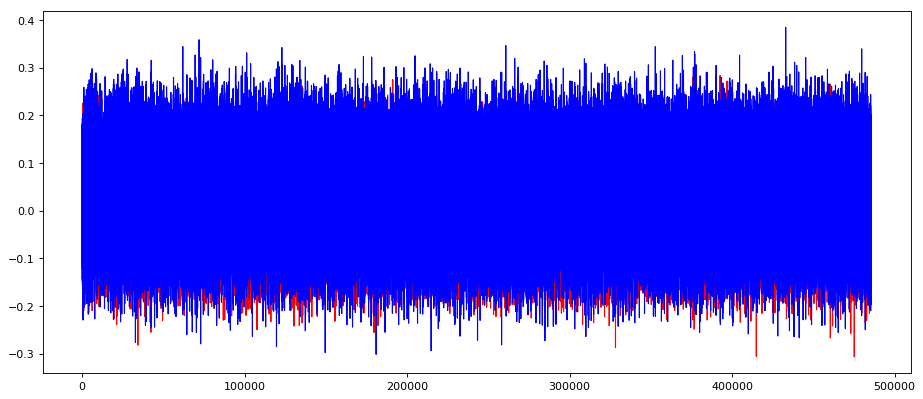

In [24]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=1)

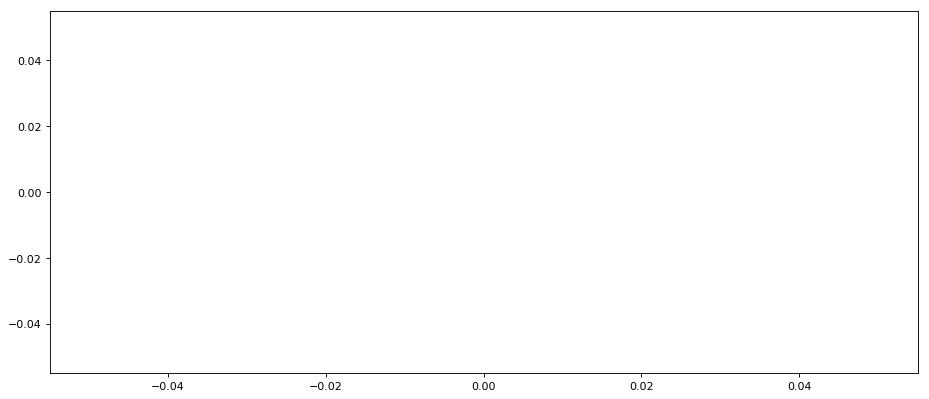

In [25]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(faulty_sample)
ax.plot(range(0,size), faulty_sample[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=1)

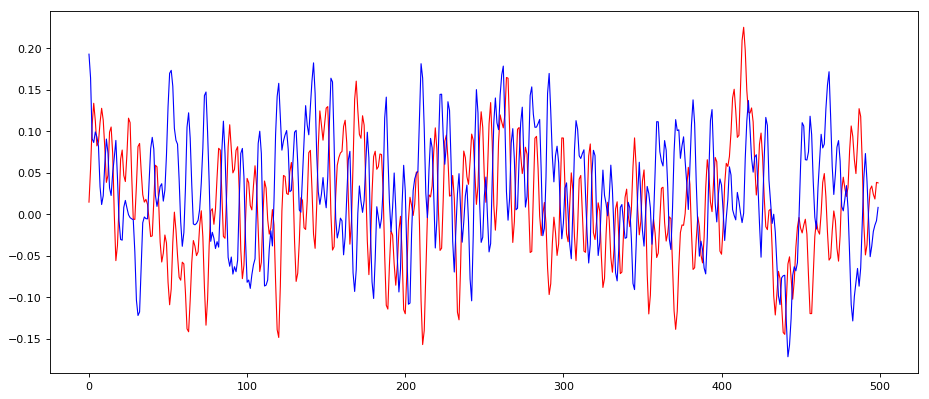

In [26]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), healthy_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

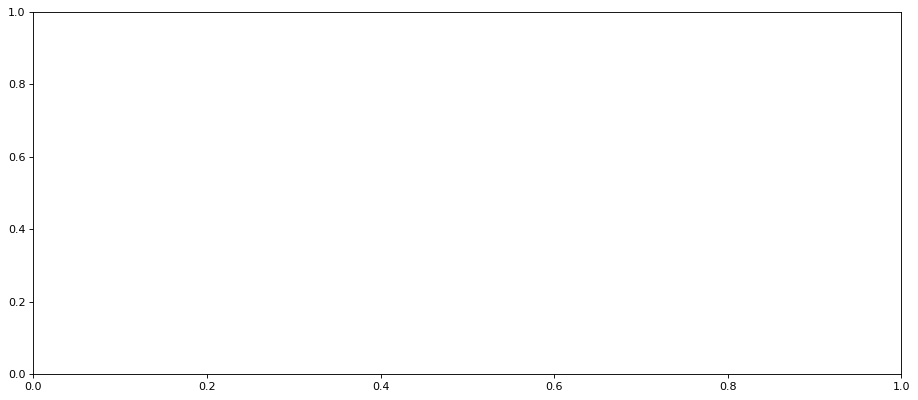

In [27]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), faulty_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), faulty_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

In [28]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [29]:
timesteps = 100
dim = 2
lossHistory = LossHistory()
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

def train(data):
    model.fit(data, data, epochs=20, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[lossHistory])

def score(data):
    yhat =  model.predict(data)
    return yhat

In [30]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))


In [47]:
def create_trimmed_recording(df,file_id):
    recording = get_recording(df,file_id) 
    samples = len(recording)
    trim = samples % 100
    recording_trimmed = recording[:samples-trim]
    recording_trimmed.shape = (int((samples-trim)/timesteps),timesteps,dim)
    return recording_trimmed


In [48]:
#pd.unique()
#df_healthy.drop(0,1).drop(2,1).drop(3,1)
pd.unique(df_healthy.iloc[:,1])

array([ 98,  97, 100])

In [49]:
file_ids = pd.unique(df_healthy.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_healthy,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses


483903
4839
100
2
Staring training on 98
Train on 4839 samples, validate on 4839 samples
Epoch 1/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0380 - val_loss: 0.0286
Epoch 2/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0191 - val_loss: 0.0099
Epoch 3/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 4/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 5/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 7/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 8/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/20
4839/4839 [==============================] - 13s 3ms/step - loss: 0.0010 - v

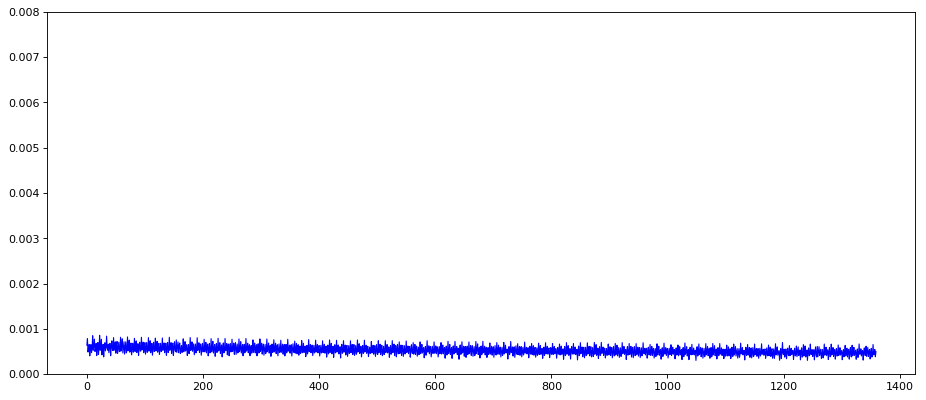

In [51]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses, '-', color='blue', animated = True, linewidth=1)

In [ ]:
#file_ids = spark.sql('select distinct _c1 from df_healhty').rdd.map(lambda row : row._c1).collect()
start = time.time()
for file_id in [105]:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lossHistory.losses

In [56]:
file_ids = pd.unique(df_faulty.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lossHistory.losses


483903
4839
100
2
Staring training on 98
Train on 4839 samples, validate on 4839 samples
Epoch 1/20
4839/4839 [==============================] - 13s 3ms/step - loss: 4.6685e-04 - val_loss: 4.7908e-04
Epoch 2/20
4839/4839 [==============================] - 13s 3ms/step - loss: 4.5497e-04 - val_loss: 3.5161e-04
Epoch 3/20
4839/4839 [==============================] - 13s 3ms/step - loss: 2.8586e-04 - val_loss: 2.1897e-04
Epoch 4/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3602e-04 - val_loss: 3.4138e-04
Epoch 5/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3868e-04 - val_loss: 3.4226e-04
Epoch 6/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3224e-04 - val_loss: 3.3069e-04
Epoch 7/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.2632e-04 - val_loss: 3.2423e-04
Epoch 8/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.2103e-04 - val_loss: 3.1341e-04
Epoch 9/20
4839/4839 [=

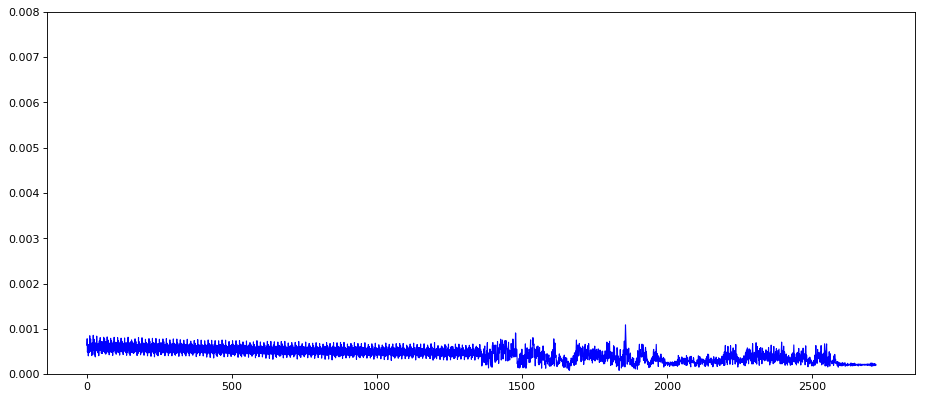

In [57]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses+faulty_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses+faulty_losses, '-', color='blue', animated = True, linewidth=1)